<a href="https://colab.research.google.com/github/omyahro/Data_200_Royals/blob/main/Commit4_Food_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do low-income, predominantly Black communities experience greater food access barriers than other racial groups?**

Supermarket access, economic conditions, and food assistance affect food availability across racial groups, highlighting inequalities in food security. Studying these factors can help address disparities and improve food access in underserved communities. The findings will highlight the disproportionate impact of food insecurity on Black communities and emphasize the need for policy interventions to address racial disparities in food access.




# **Problem Statement:**

Low-income, predominantly Black communities often experience significant barriers to accessing affordable and nutritious food. Many of these neighborhoods are classified as food deserts, where grocery stores are scarce, and fresh food options are limited. As a result, residents frequently rely on convenience stores and fast food, leading to higher rates of food insecurity and diet-related health issues.


# **Data Definition:**

The Food Access Research Atlas provides a geographic analysis of food accessibility in low-income and other census tracts using various measures of supermarket proximity. It includes data on food access for populations within these tracts and offers census-tract-level information that can be used for research or community planning.


https://catalog.data.gov/dataset/food-access-research-atlas


In [1]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path (adjust to your folder location)
file_path = "/content/drive/My Drive/Food_Access_Research_Atlas.csv"

# Read the Excel file
food_access = pd.read_csv(file_path)



Mounted at /content/drive


In [3]:
# Display the first seven rows of the dataframe
food_access.head(7)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,0,0,0,0,0,11.3,81250.0,1,1,1,1,1,0,0,0,1896.0,1912.0,1896.0,461.0,467.0,461.0,1912.0,100.00,467.0,24.42,507.0,26.52,221.0,11.56,1622.0,84.83,217.0,11.35,14.0,0.73,0.0,0.00,14.0,0.73,45.0,2.35,44.0,2.30,5.0,0.79,92.0,13.33,1896.0,99.19,461.0,24.11,504.0,26.33,219.0,11.44,1611.0,84.26,214.0,11.17,14.0,0.72,0.0,0.00,14.0,0.73,44.0,2.31,43.0,2.27,5.0,0.79,92.0,13.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,1,1,0,0,1,17.9,49000.0,1,1,1,1,1,0,0,0,1261.0,2170.0,1261.0,604.0,962.0,604.0,2170.0,100.00,962.0,44.34,606.0,27.93,214.0,9.86,888.0,40.92,1217.0,56.08,5.0,0.23,0.0,0.00,5.0,0.23,55.0,2.53,75.0,3.46,93.0,12.47,161.0,21.70,1261.0,58.11,604.0,27.83,406.0,18.69,127.0,5.83,357.0,16.43,854.0,39.36,4.0,0.18,0.0,0.00,4.0,0.20,42.0,1.93,33.0,1.52,67.0,9.00,96.0,12.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,0,0,0,0,0,15.0,62609.0,1,1,1,1,1,0,0,0,1552.0,2857.0,1552.0,478.0,971.0,478.0,2857.0,84.70,971.0,28.79,771.0,22.86,358.0,10.60,2177.0,64.53,554.0,16.43,10.0,0.30,1.0,0.03,10.0,0.30,105.0,3.10,78.0,2.30,39.0,3.09,139.0,11.05,1552.0,46.00,478.0,14.18,416.0,12.34,201.0,5.96,1242.0,36.81,255.0,7.56,8.0,0.24,0.0,0.00,2.0,0.06,45.0,1.33,36.0,1.08,0.0,0.00,74.0,5.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.0,894.0,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,0,0,0,0,0,2.8,70607.0,1,1,1,1,1,0,0,0,1363

In [4]:
# Display the bottom seven rows of the dataframe
food_access.tail(7)


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
72524,56041975300,Wyoming,Uinta County,0,7761,2696,0,205.0,2.64,0,0,0,0,0,0,13.6,62445.0,0,0,0,0,0,0,0,0,479.0,479.0,5.0,264.0,264.0,3.0,6037.0,77.78,2302.0,29.66,1882.0,24.25,455.0,5.86,5509.0,70.99,13.0,0.17,24.0,0.31,20.0,0.26,34.0,0.43,436.0,5.62,613.0,7.90,96.0,3.57,194.0,7.19,3934.0,50.69,1772.0,22.84,1197.0,15.43,339.0,4.36,3583.0,46.17,10.0,0.13,14.0,0.18,9.0,0.11,17.0,0.22,301.0,3.88,435.0,5.61,51.0,1.90,127.0,4.70,479.0,6.17,264.0,3.40,118.0,1.52,73.0,0.95,466.0,6.00,0.0,0.00,1.0,0.01,2.0,0.03,1.0,0.01,9.0,0.11,13.0,0.17,5.0,0.17,16.0,0.61,5.0,0.06,3.0,0.04,1.0,0.02,1.0,0.02,5.0,0.06,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.01,2965.0,2387.0,569.0,7052.0,21.0,29.0,23.0,64.0,572.0,797.0,107.0,255.0
72525,56041975400,Wyoming,Uinta County,0,6852,2632,0,65.0,0.95,0,0,0,1,1,1,17.3,57248.0,0,0,0,0,0,0,0,1,120.0,120.0,NaN,24.0,24.0,NaN,5809.0,84.78,2151.0,31.39,1632.0,23.83,575.0,8.39,5221.0,76.19,15.0,0.22,13.0,0.19,1.0,0.01,60.0,0.87,500.0,7.29,751.0,10.96,108.0,4.12,180.0,6.83,3112.0,45.42,1107.0,16.16,909.0,13.26,255.0,3.72,2852.0,41.62,7.0,0.10,9.0,0.13,0.0,0.01,33.0,0.48,211.0,3.08,328.0,4.79,49.0,1.87,89.0,3.39,120.0,1.76,24.0,0.35,46.0,0.67,10.0,0.15,114.0,1.66,0.0,0.00,1.0,0.01,0.0,0.00,3.0,0.05,3.0,0.04,1.0,0.01,0.0,0.00,3.0,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2273.0,1921.0,709.0,6160.0,20.0,19.0,2.0,67.0,584.0,871.0,124.0,217.0
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.71,0,0,0,0,0,0,9.7,67254.0,1,1,1,0,0,1,1,1,902.0,902.0,730.0,218.0,218.0,176.0,3326.0,99.99,843.0,25.36,884.0,26.58,593.0,17.83,3106.0,93.38,6.0,0.18,15.0,0.45,0.0,0.00,27.0,0.81,172.0,5.17,309.0,9.29,67.0,5.06,64.0,4.83,2714.0,81.60,675.0,20.29,716.0,21.52,472.0,14.18,2550.0,76.67,6.0,0.18,14.0,0.42,0.0,0.00,21.0,0.62,123.0,3.70,221.0,6.64,34.0,2.56,50.0,3.82,902.0,27.12,218.0,6.56,177.0,5.33,218.0,6.56,857.0,25.75,2.0,0.06,6.0,0.19,0.0,0.00,5.0,0.15,32.0,0.96,35.0,1.05,7.0,0.51,19.0,1.47,730.0,21.95,176.0,5.30,144.0,4.33,191.0,5.74,695.0,20.90,0.0,0.0,1.0,0.03,0.0,0.0,4.0,0.12,30.0,0.90,24.0,0.72,6.0,0.0,16.0,1.23,765.0,884.0,593.0,3106.0,6.0,15.0,0.0,27.0,172.0

In [5]:
food_access.shape


(72531, 147)

In [6]:
72531 * 147

10662057

State the shape of the dataframe :

How many rows does the dataframe have?

- 72531 rows

How many columns does the dataframe have?

- 147 columns

What is the total number of datapoints expected in the dataset (rows x columns)?

- 10662057 total datapoints

In [7]:
food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [8]:
food_access.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 147 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    CensusTract           72531 non-null  int64  
 1    State                 72531 non-null  object 
 2    County                72531 non-null  object 
 3    Urban                 72531 non-null  int64  
 4    Pop2010               72531 non-null  int64  
 5    OHU2010               72531 non-null  int64  
 6    GroupQuartersFlag     72531 non-null  int64  
 7    NUMGQTRS              72506 non-null  float64
 8    PCTGQTRS              72506 non-null  float64
 9    LILATracts_1And10     72531 non-null  int64  
 10   LILATracts_halfAnd10  72531 non-null  int64  
 11   LILATracts_1And20     72531 non-null  int64  
 12   LILATracts_Vehicle    72531 non-null  int64  
 13   HUNVFlag              72531 non-null  int64  
 14   LowIncomeTracts       72531 non-null  int64  
 15   

In [9]:
food_accessColumns = food_access.columns
food_accessColumns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [10]:
food_access.isnull().sum()


,0
CensusTract,0
State,0
County,0
Urban,0
Pop2010,0
OHU2010,0
GroupQuartersFlag,0
NUMGQTRS,25
PCTGQTRS,25
LILATracts_1And10,0


In [11]:
def missing(DataFrame):
    print ('Percentage of missing values in the dataset:\n',
           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))


# Call the function and execute
# Syntax: missing(DataFrame)
missing(food_access)

Percentage of missing values in the dataset:
 lanhopi20               97.92
lalowi20                97.92
lanhopi20share          97.92
laaian20                97.92
laaian20share           97.92
laomultir20             97.92
laomultir20share        97.92
lahisp20                97.92
lahunv20                97.92
lasnap20                97.92
lapop20                 97.92
lapop20share            97.92
lahisp20share           97.92
lalowi20share           97.92
lawhite20               97.92
lakids20                97.92
laasian20               97.92
lablack20share          97.92
lablack20               97.92
lawhite20share          97.92
laasian20share          97.92
laseniors20             97.92
lakids20share           97.92
laseniors20share        97.92
lahunv20share           97.78
lasnap20share           97.78
laasian10share          89.29
laseniors10             89.29
lablack10share          89.29
lablack10               89.29
lawhite10share          89.29
lawhite10               

**Observations**:

How many missing values are there?

- There are missing values in many of the columns; some variables have missing data of over 97%, while others have moderate missingness of between 27% and 49%.  Some of the columns, such as State, County, and CensusTract, have no missing data, while others have minimal missing values, (<1%).


Are these concentrated in specific rows or columns? How does this affect the analysis?

- The majority of missing values are found in specific columns, particularly those pertaining to race and food access.  Comparing various racial groups may become more difficult as a result, and bias may develop if more data is missing from some communities or regions.

Based on the information that is present, how should the missing values be handled?
How will this affect the analysis?
- Columns missing too much data (over 30%) should be removed. Those with moderate missing data (5%-20%) can be filled in using averages or the most common values. Removing extremely incomplete columns guarantees more trustworthy results.  Although it helps preserve more data, filling in missing values could result in minor mistakes.  The analysis may understate disparities in food access in some communities if missing data is dispersed unevenly.





In [12]:
columns_to_drop = [
    'lanhopi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share',
    'lahisp20', 'lahisp20share', 'lawhite20', 'lawhite20share', 'laasian20', 'laasian20share',
    'laseniors20', 'laseniors20share', 'lakids20', 'lakids20share', 'lapop20', 'lapop20share',
    'lalowi20', 'lalowi20share', 'lahunv20', 'lahunv20share', 'lasnap20', 'lasnap20share',
    'laasian10', 'laasian10share', 'lahisp10', 'lahisp10share', 'lablack10', 'lablack10share',
    'lawhite10', 'lawhite10share', 'laseniors10', 'laseniors10share', 'lakids10', 'lakids10share',
    'lalowi10', 'lalowi10share', 'lapop10', 'lapop10share', 'lahunv10', 'lahunv10share',
    'lasnap10', 'lasnap10share', 'LAPOP1_20', 'LALOWI1_20', 'LALOWI1_10', 'LAPOP1_10'
]

food_access = food_access.drop(columns=[col for col in columns_to_drop if col in food_access.columns], errors='ignore')

# Check missing values
food_access.isnull().sum()



,0
CensusTract,0
State,0
County,0
Urban,0
Pop2010,0
OHU2010,0
GroupQuartersFlag,0
NUMGQTRS,25
PCTGQTRS,25
LILATracts_1And10,0


In [13]:
food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 99 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           72531 non-null  int64  
 1   State                 72531 non-null  object 
 2   County                72531 non-null  object 
 3   Urban                 72531 non-null  int64  
 4   Pop2010               72531 non-null  int64  
 5   OHU2010               72531 non-null  int64  
 6   GroupQuartersFlag     72531 non-null  int64  
 7   NUMGQTRS              72506 non-null  float64
 8   PCTGQTRS              72506 non-null  float64
 9   LILATracts_1And10     72531 non-null  int64  
 10  LILATracts_halfAnd10  72531 non-null  int64  
 11  LILATracts_1And20     72531 non-null  int64  
 12  LILATracts_Vehicle    72531 non-null  int64  
 13  HUNVFlag              72531 non-null  int64  
 14  LowIncomeTracts       72531 non-null  int64  
 15  PovertyRate        

In [14]:
food_access.describe()

,CensusTract,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP05_10,LALOWI05_10,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lablack20,lablack20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72506.000000,72506.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72528.000000,71783.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,72531.000000,57991.000000,57991.000000,67963.000000,67963.00000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.000000,67963.00000,67963.000000,67963.000000,67963.000000,67969.000000,67963.000000,67969.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52542.000000,52565.000000,52542.000000,52565.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,1506.000000,1506.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
mean,2.782573e+10,0.760626,4256.739022,1609.191821,0.007114,110.121549,2.708677,0.128125,0.279150,0.112228,0.139609,0.210820,0.417573,15.183864,77037.792249,0.379810,0.682756,0.340668,0.638830,0.335884,0.043926,0.004784,0.214750,2657.206946,797.488214,3166.061901,73.42577,955.153495,23.095219,770.609493,17.395343,422.928564,10.325693,2428.490944,56.060217,360.950326,9.064957,115.071833,2.398870,4.783117,0.104870,31.484852,0.806837,225.295322,4.98998,401.074129,8.631819,69.491223,4.684649,135.491120,8.934348,2337.675612,54.081743,669.711107,16.149574,569.749496,12.810448,319.298675,7.826267,1904.910319,44.084766,218.471946,5.243149,57.908587,1.172348,2.883312,0.063707,27.301131,0.724699,126.201591,2.793007,215.850101,4.630486,39.596875,2.631525,92.520003,5.995943,0.521762,0.026813,38.426346,1.250255,30.291398,0.971561,3.717131,0.138612,1385.054352,1022.695327,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,0.426704,1955.987626,725.676046,0.084046,443.931753,9.570875,0.334231,0.448584,0.315649,0.346584,0.407894,0.493162,11.919903,37544.445885,0.485343,0.465406,0.473937,0.480343,0.472302,0.204932,0.069002,0.410651,2044.331313,771.432588,2003.570508,29.06663,790.299662,16.502754,582.563153,8.473848,328.272913,7.330619,1772.177187,30.344494,687.258803,16.866031,269.501279,4.930797,33.925042,0.776388,173.356852,4.574504,331.576406,6.17208,742.022316,13.411754,80.667756,6.011297,135.906721,9.072652,1980.761103,36.760908,706.558756,1

In [15]:
maxValuesFA = food_access.max()

maxValuesFA


,0
CensusTract,56045951300
State,Wyoming
County,Ziebach County
Urban,1
Pop2010,37452
OHU2010,16043
GroupQuartersFlag,1
NUMGQTRS,19496.0
PCTGQTRS,100.0
LILATracts_1And10,1


In [16]:
minValuesFA = food_access.min()
minValuesFA


,0
CensusTract,1001020100
State,Alabama
County,Abbeville County
Urban,0
Pop2010,1
OHU2010,0
GroupQuartersFlag,0
NUMGQTRS,0.0
PCTGQTRS,0.0
LILATracts_1And10,0


In [17]:
food_access.describe().T


,count,mean,std,min,25%,50%,75%,max
CensusTract,72531.0,2.782573e+10,1.581647e+10,1.001020e+09,1.212708e+10,2.712979e+10,4.103900e+10,5.604595e+10
Urban,72531.0,7.606265e-01,4.267040e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Pop2010,72531.0,4.256739e+03,1.955988e+03,1.000000e+00,2.899000e+03,4.011000e+03,5.330500e+03,3.745200e+04
OHU2010,72531.0,1.609192e+03,7.256760e+02,0.000000e+00,1.108000e+03,1.525000e+03,2.021000e+03,1.604300e+04
GroupQuartersFlag,72531.0,7.114199e-03,8.404573e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
NUMGQTRS,72506.0,1.101215e+02,4.439318e+02,0.000000e+00,0.000000e+00,7.000000e+00,6.400000e+01,1.949600e+04
PCTGQTRS,72506.0,2.708677e+00,9.570875e+00,0.000000e+00,0.000000e+00,1.800000e-01,1.570000e+00,1.000000e+02
LILATracts_1And10,72531.0,1.281245e-01,3.342307e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
LILATracts_halfAnd10,72531.0,2.791496e-01,4.485843e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
LILATracts_1And20,72531.0,1.122279e-01,3.156488e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


**Observations of Descriptive Statistics**

**What are the minimum and maximum values?**

The minimum population is 1, and the maximum is 37,452.  
The minimum poverty rate is 0%, and the maximum is 100%.  
The minimum median family income is 2,499, while the maximum $250,001.  
The minimum Black population is 0, and the maximum is 16,804.



**Are the mean and median values close to each other? If so this could indicate a normal distribution of the data. If not, this could indicate skewness in the data.
If the mean is smaller than the median the values are likely skewed left, toward the minimum value. If the mean is larger than the median then there is skewness to the right indicating more high values in the data distribution.**
- The mean is higher than the median for all the columns, which means the data is skewed to the right. This suggests there are some higher values pulling the average up.







# **Commit #4**

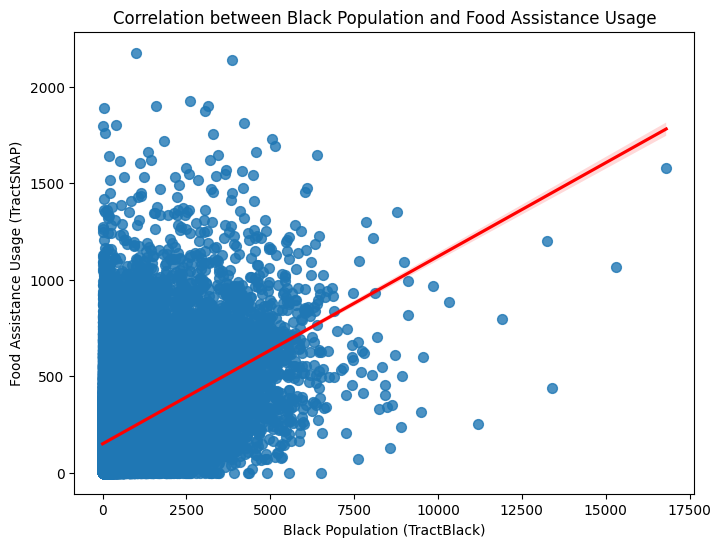

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['TractBlack', 'TractSNAP']

# Create the scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='TractBlack', y='TractSNAP', data=food_access, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Black Population and Food Assistance Usage')
plt.xlabel('Black Population (TractBlack)')
plt.ylabel('Food Assistance Usage (TractSNAP)')
plt.show()


The scatter plot displays the relationship between the use of food assistance programs (represented by TractSNAP) and the percentage of the Black population (represented by TractBlack) in various census tracts.